In [1]:
# 📦 Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 📂 Step 2: Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Preview the data
df.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 🧾 Step 3: Display basic info and summary statistics
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  20 non-null     int64  
 1   Survived     20 non-null     int64  
 2   Pclass       20 non-null     int64  
 3   Name         20 non-null     object 
 4   Gender       20 non-null     object 
 5   Age          17 non-null     float64
 6   SibSp        20 non-null     int64  
 7   Parch        20 non-null     int64  
 8   Ticket       20 non-null     object 
 9   Fare         20 non-null     float64
 10  Cabin        5 non-null      object 
 11  Embarked     20 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,20.00000,20.000000,20.000000,17.000000,20.000000,20.000000,20.000000
mean,10.50000,0.500000,2.450000,28.000000,0.700000,0.500000,22.199370
std,5.91608,0.512989,0.825578,17.779904,1.080935,1.192079,18.058888
min,1.00000,0.000000,1.000000,2.000000,0.000000,0.000000,7.225000
25%,5.75000,0.000000,2.000000,14.000000,0.000000,0.000000,8.050000
50%,10.50000,0.500000,3.000000,27.000000,0.000000,0.000000,16.350000
75%,15.25000,1.000000,3.000000,38.000000,1.000000,0.250000,29.361450
max,20.00000,1.000000,3.000000,58.000000,4.000000,5.000000,71.283300


In [3]:
# 🧹 Step 4: Clean the data (drop rows with missing Age)
df_clean = df.dropna(subset=["Age"])
df_clean = df_clean[["Survived", "Age", "Fare", "SibSp", "Parch"]].apply(pd.to_numeric, errors='coerce')


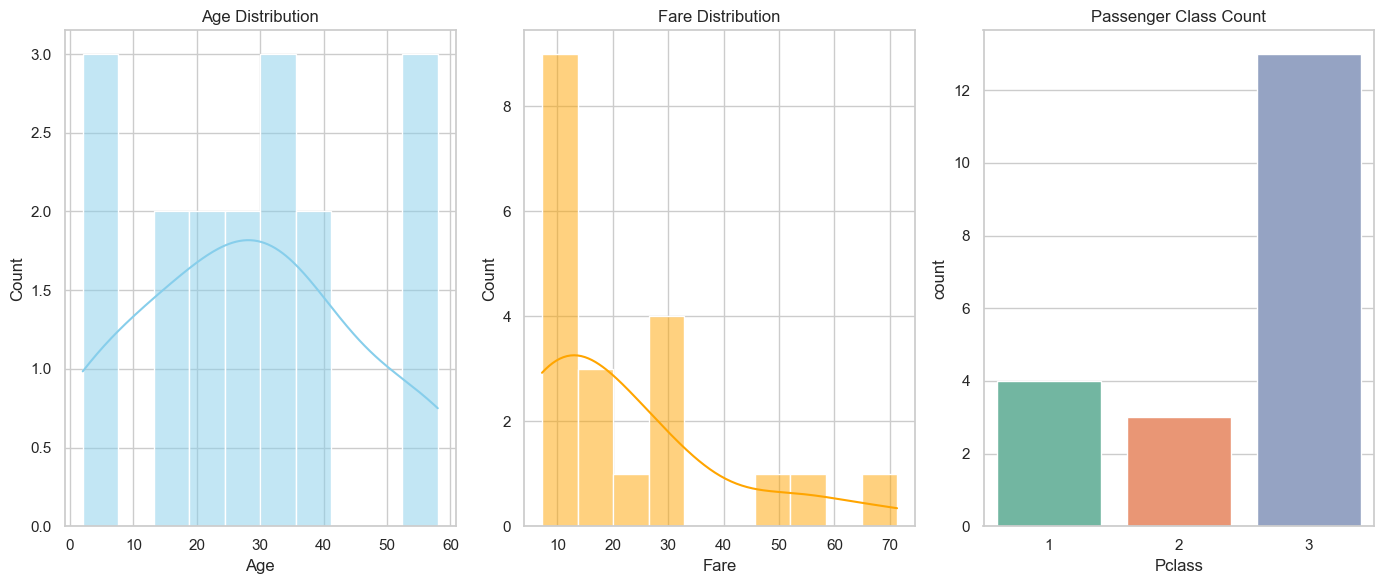

In [8]:
# 📊 Updated Histograms for Age, Fare, and Pclass (no future warning)
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_clean["Age"], bins=10, kde=True, color="skyblue")
plt.title("Age Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df["Fare"], bins=10, kde=True, color="orange")
plt.title("Fare Distribution")

plt.subplot(1, 3, 3)
sns.countplot(x="Pclass", data=df, hue="Pclass", palette="Set2", legend=False)
plt.title("Passenger Class Count")

plt.tight_layout()
plt.show()


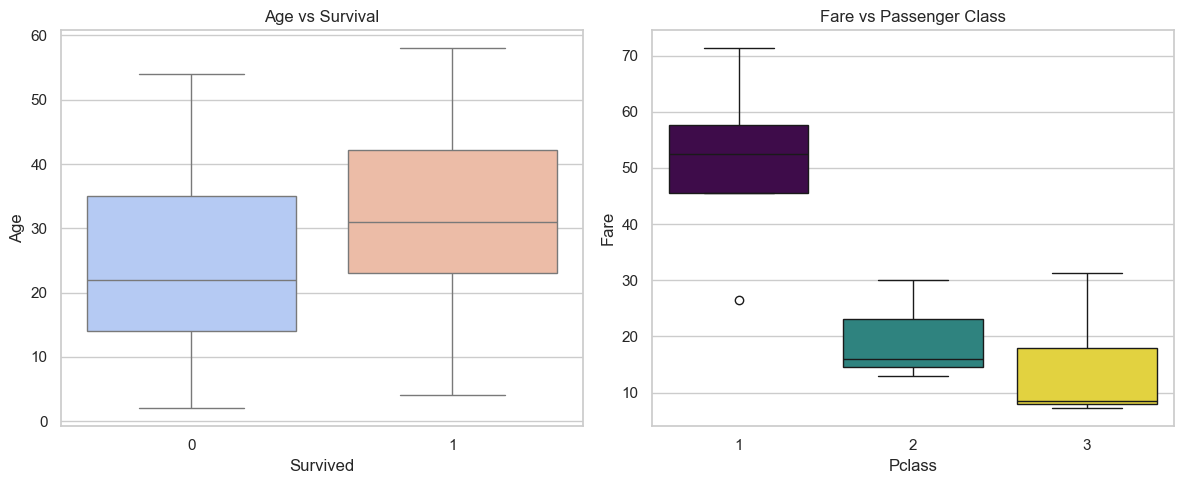

In [10]:
# 📦 Updated Step 6: Boxplots (no future warnings)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Survived", y="Age", data=df.dropna(subset=["Age"]),
            hue="Survived", palette="coolwarm", legend=False)
plt.title("Age vs Survival")

plt.subplot(1, 2, 2)
sns.boxplot(x="Pclass", y="Fare", data=df,
            hue="Pclass", palette="viridis", legend=False)
plt.title("Fare vs Passenger Class")

plt.tight_layout()
plt.show()



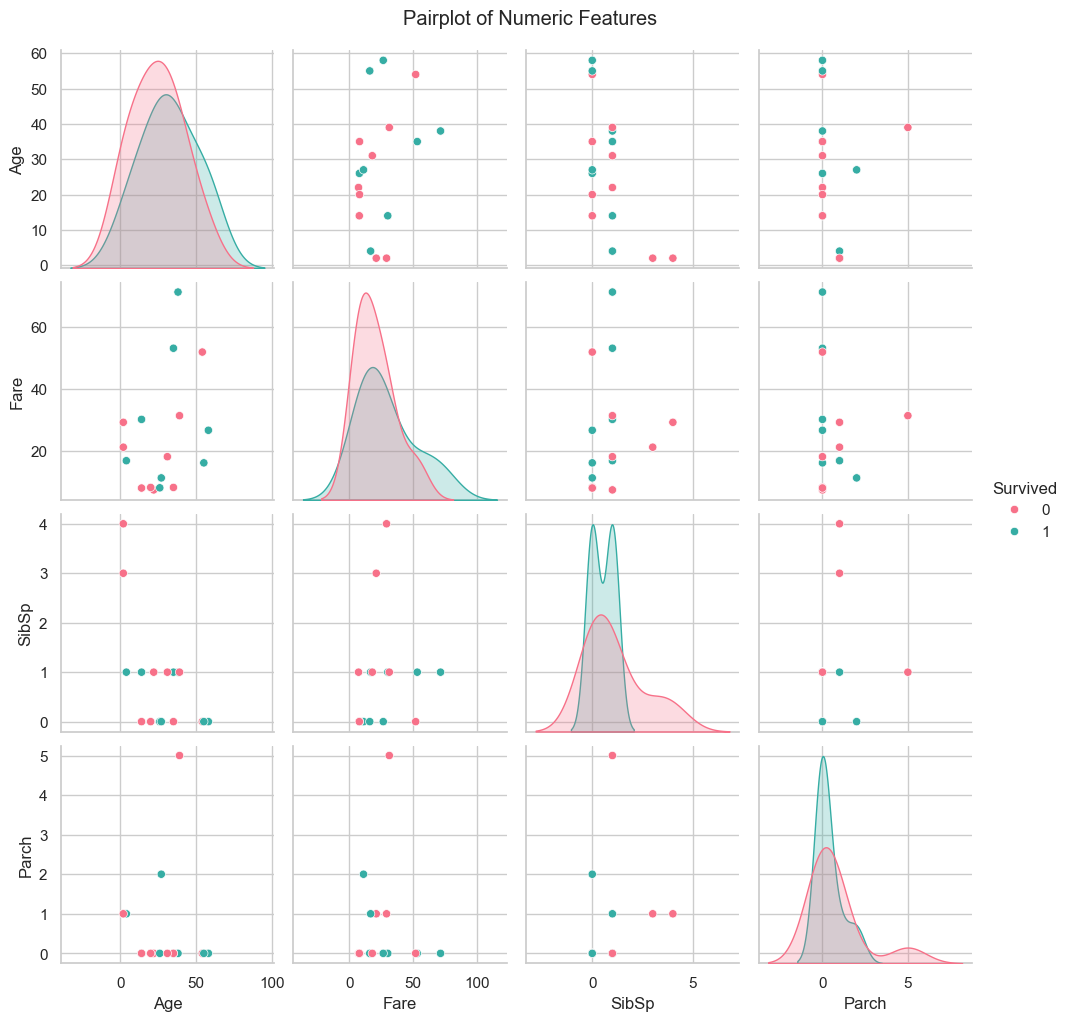

In [6]:

# 🔗 Step 7: Pairplot to explore feature relationships
sns.pairplot(df_clean, hue="Survived", palette="husl")
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


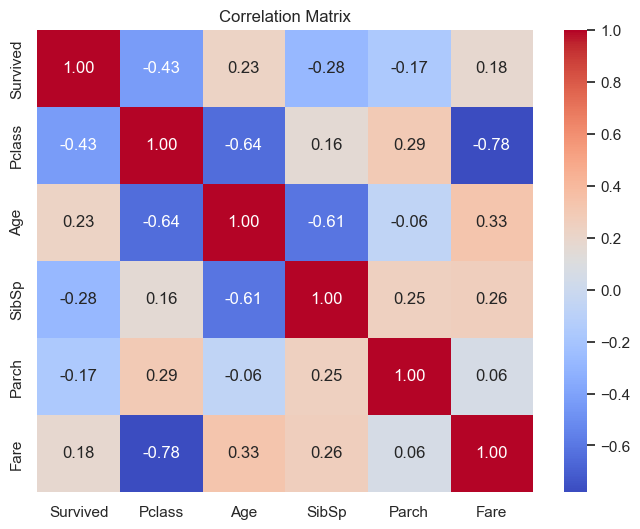

In [7]:
# 🧠 Step 8: Correlation matrix heatmap
plt.figure(figsize=(8, 6))
corr = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
